### Importações

In [2]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics 

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px 

import re
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 300

df = pd.read_csv('./dados.csv')
dfSemOutlier = pd.read_csv('./dados_sem_outlier.csv')

dfSemOutlier

,modelo,marca,valor,km,transmissao,combustivel,cor,ano,novidade,vendedor
0,CRUZE,CHEVROLET,125990.0,26578.0,automatico,flex,Prata,2022,False,Autoforte Veículos Ltda
1,CHERY,CAOA,159990.0,30474.0,automatico,gasolina,Preto,2022,False,Autoforte Veículos Ltda
2,YARIS,TOYOTA,98990.0,28079.0,NaN,flex,Azul,2022,False,Toyolex Seminovos - Aracaju
3,ETIOS,TOYOTA,62990.0,67795.0,automatico,flex,Cinza,2019,False,Toyolex Seminovos - Aracaju
4,CRETA,HYUNDAI,98990.0,37931.0,automatico,flex,Preto,2019,False,Toyolex Seminovos - Aracaju
...,...,...,...,...,...,...,...,...,...,...
1409,PICANTO,KIA,31990.0,62000.0,automatico,flex,2012,2012,False,Indique Auto
1410,HB20,HYUNDAI,52990.0,15000.0,manual,flex,Prata,2016,False,Indique Auto
1411,MARCH,NISSAN,34990.0,30000.0,manual,flex,2016,2016,False,Indique Auto
1412,318i,BMW,63990.0,67000.0,automatico,gasolina,Preto,2012,False,Indique Auto


### Tratamento de dados:

    Codificar: Marca, Transmissao, combustivel, cor, novidade e vendedor

#### Dataframe Categórico:

In [4]:
dfSemOutlier['cor'] = dfSemOutlier['cor'].astype(str).apply(lambda x: re.sub(r'\d+', 'TIRAR', x))

dfSemOutlier = dfSemOutlier.dropna().reset_index(drop=True)

dfSemOutlier = dfSemOutlier[dfSemOutlier['cor'].str.contains('TIRAR')==False].reset_index(drop=True)

colunas = list(dfSemOutlier.columns)
print('colunas :', colunas)

colunas_codificaveis = ['modelo', 'marca', 'transmissao', 'combustivel', 'cor', 'novidade', 'vendedor']

dfCodificado = pd.DataFrame()

dfCodificado['valor'] = dfSemOutlier['valor'].astype('float')
dfCodificado['km'] = dfSemOutlier['km'].astype('float')
dfCodificado['ano'] = dfSemOutlier['ano'].astype('int')

for col in colunas_codificaveis:

    nome_novo = col + '_codificada'
    dfCodificado[nome_novo] = dfSemOutlier[col].astype('category').cat.codes.astype(int)

    lista_vals_unicos = list(dfCodificado[nome_novo].unique())
    lista_vals_unicos.sort()

    print(col, ':', lista_vals_unicos)

print('colunas codificadas:', list(dfCodificado.columns))

dfCodificado

colunas : ['modelo', 'marca', 'valor', 'km', 'transmissao', 'combustivel', 'cor', 'ano', 'novidade', 'vendedor']
modelo : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
marca : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
transmissao : [0, 1]
combustivel : [0, 1, 2]
cor : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
novidade : [0, 1]
vendedor : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46

,valor,km,ano,modelo_codificada,marca_codificada,transmissao_codificada,combustivel_codificada,cor_codificada,novidade_codificada,vendedor_codificada
0,125990.0,26578.0,2022,40,4,0,1,7,0,15
1,159990.0,30474.0,2022,28,2,0,2,8,0,15
2,62990.0,67795.0,2019,47,20,0,1,3,0,129
3,98990.0,37931.0,2019,37,9,0,1,8,0,129
4,149990.0,29901.0,2022,35,11,0,1,9,0,129
...,...,...,...,...,...,...,...,...,...,...
1083,37990.0,13000.0,2017,56,21,1,1,8,0,66
1084,83990.0,28858.0,2017,36,20,0,1,0,0,66
1085,52990.0,15000.0,2016,59,9,1,1,7,0,66
1086,63990.0,67000.0,2012,5,1,0,2,8,0,66


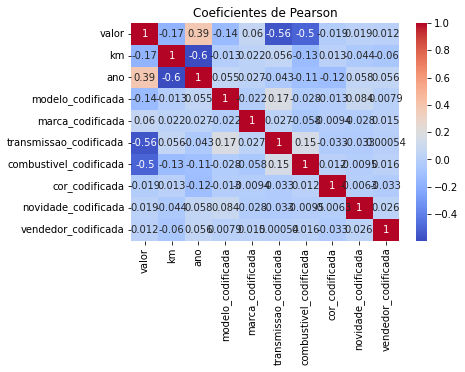

In [5]:
# Calcular as correlações entre as colunas
correlations = dfCodificado[dfCodificado.columns].corr()

# Plotar um mapa de calor das correlações
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Coeficientes de Pearson')
plt.show()

### Normalizando dados:

In [223]:
# DFNORMALIZADO REPRESENTA O DATAFRAME CATEGORICO
dfNormalizado = pd.DataFrame()

for col in dfCodificado.columns:

    min_value = dfCodificado[col].min()
    max_value = dfCodificado[col].max()
    dfNormalizado[col + '_normalizada'] = ((dfCodificado[col] - min_value) / (max_value - min_value)) * 2 - 1

dfNormalizado

,valor_normalizada,km_normalizada,ano_normalizada,modelo_codificada_normalizada,marca_codificada_normalizada,transmissao_codificada_normalizada,combustivel_codificada_normalizada,cor_codificada_normalizada,novidade_codificada_normalizada,vendedor_codificada_normalizada
0,0.026410,-0.659721,0.818182,-0.327731,-0.636364,-1.0,0.0,0.272727,-1.0,-0.784173
1,0.354120,-0.609838,0.818182,-0.529412,-0.818182,-1.0,1.0,0.454545,-1.0,-0.784173
2,-0.580819,-0.131998,0.272727,-0.210084,0.818182,-1.0,0.0,-0.454545,-1.0,0.856115
3,-0.233831,-0.514362,0.272727,-0.378151,-0.181818,-1.0,0.0,0.454545,-1.0,0.856115
4,0.257735,-0.617175,0.818182,-0.411765,0.000000,-1.0,0.0,0.636364,-1.0,0.856115
...,...,...,...,...,...,...,...,...,...,...
1083,-0.821783,-0.833567,-0.090909,-0.058824,0.909091,1.0,0.0,0.454545,-1.0,-0.050360
1084,-0.378410,-0.630529,-0.090909,-0.394958,0.818182,-1.0,0.0,-1.000000,-1.0,-0.050360
1085,-0.677205,-0.807960,-0.272727,-0.008403,-0.181818,1.0,0.0,0.272727,-1.0,-0.050360
1086,-0.571181,-0.142177,-1.000000,-0.915966,-0.909091,-1.0,1.0,0.454545,-1.0,-0.050360


In [224]:
# DFNORMALIZADOSEMMODELO REPRESENTA O DATAFRAME CATEGORICO SEM O MODELO
dfNormalizadoSemModelo = dfNormalizado.copy()
dfNormalizadoSemModelo = dfNormalizadoSemModelo.drop('modelo_codificada_normalizada', axis=1)

dfNormalizadoSemModelo

,valor_normalizada,km_normalizada,ano_normalizada,marca_codificada_normalizada,transmissao_codificada_normalizada,combustivel_codificada_normalizada,cor_codificada_normalizada,novidade_codificada_normalizada,vendedor_codificada_normalizada
0,0.026410,-0.659721,0.818182,-0.636364,-1.0,0.0,0.272727,-1.0,-0.784173
1,0.354120,-0.609838,0.818182,-0.818182,-1.0,1.0,0.454545,-1.0,-0.784173
2,-0.580819,-0.131998,0.272727,0.818182,-1.0,0.0,-0.454545,-1.0,0.856115
3,-0.233831,-0.514362,0.272727,-0.181818,-1.0,0.0,0.454545,-1.0,0.856115
4,0.257735,-0.617175,0.818182,0.000000,-1.0,0.0,0.636364,-1.0,0.856115
...,...,...,...,...,...,...,...,...,...
1083,-0.821783,-0.833567,-0.090909,0.909091,1.0,0.0,0.454545,-1.0,-0.050360
1084,-0.378410,-0.630529,-0.090909,0.818182,-1.0,0.0,-1.000000,-1.0,-0.050360
1085,-0.677205,-0.807960,-0.272727,-0.181818,1.0,0.0,0.272727,-1.0,-0.050360
1086,-0.571181,-0.142177,-1.000000,-0.909091,-1.0,1.0,0.454545,-1.0,-0.050360


### Regressão Linear:

#### Colunas categóricas:

##### Primeiro modelo:

In [227]:
colunas_codificadas_normalizadas = ['km_normalizada', 'ano_normalizada', 'modelo_codificada_normalizada', 'marca_codificada_normalizada', 'transmissao_codificada_normalizada', 'combustivel_codificada_normalizada', 'cor_codificada_normalizada']

In [228]:
# Dividir os dados em variáveis independentes (X) e variável dependente (y)
X = dfNormalizado[colunas_codificadas_normalizadas]
y = dfNormalizado['valor_normalizada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treinamento:", len(X_train), "Features:", X_train.shape[1])
print("Tamanho do conjunto de teste:", len(X_test), "Features:", X_test.shape[1])

Tamanho do conjunto de treinamento: 870 Features: 7
Tamanho do conjunto de teste: 218 Features: 7


In [229]:
min_valor = dfCodificado['valor'].min()
max_valor = dfCodificado['valor'].max()

y_desnormalizado_test = (y_test + 1) * (max_valor - min_valor) / 2 + min_valor
y_desnormalizado = (y + 1) * (max_valor - min_valor) / 2 + min_valor

# Processo de regressão linear, passo o conjunto de treino
modelskl = LinearRegression()
modelskl.fit(X_train, y_train)
print(modelskl.coef_, modelskl.intercept_)

# Vendo a predição com base no conjunto de teste
y_pred = modelskl.predict(X_test)
y_pred_desnormalizado = (y_pred + 1) * (max_valor - min_valor) / 2 + min_valor

# Calcular o Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_desnormalizado_test, y_pred_desnormalizado)

# Calcular o Erro Médio Absoluto (EMA)
ema = mean_absolute_error(y_desnormalizado_test, y_pred_desnormalizado)

# Exibir os resultados
print("Erro Quadrático Médio (EQM):", eqm)
print("Erro Médio Absoluto (EMA):", ema)
print("Média do y:", y_desnormalizado.mean())

[-0.01436959  0.29174621 -0.06727456  0.02832547 -0.21790261 -0.39843678
  0.00759363] -0.4342053834751768
Erro Quadrático Médio (EQM): 830351316.1450534
Erro Médio Absoluto (EMA): 20387.938868493977
Média do y: 91891.79502757353


##### Segundo modelo: (Sem a coluna _modelo_)

In [230]:
colunas_codificadas_normalizadas = ['km_normalizada', 'ano_normalizada', 'marca_codificada_normalizada', 'transmissao_codificada_normalizada', 'combustivel_codificada_normalizada', 'cor_codificada_normalizada']

In [231]:
# Dividir os dados em variáveis independentes (X) e variável dependente (y)
X = dfNormalizadoSemModelo[colunas_codificadas_normalizadas]
y = dfNormalizadoSemModelo['valor_normalizada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treinamento:", len(X_train), "Features:", X_train.shape[1])
print("Tamanho do conjunto de teste:", len(X_test), "Features:", X_test.shape[1])

Tamanho do conjunto de treinamento: 870 Features: 6
Tamanho do conjunto de teste: 218 Features: 6


In [232]:
min_valor = dfCodificado['valor'].min()
max_valor = dfCodificado['valor'].max()

y_desnormalizado_test = (y_test + 1) * (max_valor - min_valor) / 2 + min_valor
y_desnormalizado = (y + 1) * (max_valor - min_valor) / 2 + min_valor

# Processo de regressão linear, passo o conjunto de treino
modelskl = LinearRegression()
modelskl.fit(X_train, y_train)
print(modelskl.coef_, modelskl.intercept_)

# Vendo a predição com base no conjunto de teste
y_pred = modelskl.predict(X_test)
y_pred_desnormalizado = (y_pred + 1) * (max_valor - min_valor) / 2 + min_valor

# Calcular o Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_desnormalizado_test, y_pred_desnormalizado)

# Calcular o Erro Médio Absoluto (EMA)
ema = mean_absolute_error(y_desnormalizado_test, y_pred_desnormalizado)

# Exibir os resultados
print("Erro Quadrático Médio (EQM):", eqm)
print("Erro Médio Absoluto (EMA):", ema)
print("Média do y:", y_desnormalizado.mean())

[-0.01605923  0.28593571  0.02949803 -0.22449052 -0.39645781  0.00773292] -0.4407599963027169
Erro Quadrático Médio (EQM): 857438263.8468866
Erro Médio Absoluto (EMA): 20904.890565536294
Média do y: 91891.79502757353


Erro sem a coluna _modelo_ um pouco maior